## 将数据集划分成训练集、验证集、测试集并存储成TFRecord文件

In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#官方读取数据方法
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
data = input_data.read_data_sets('data/fashion',dtype='uint8')

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


### 划分数据集为训练集 验证集 测试集

In [4]:
tra_img=data.train.images
tra_lab=data.train.labels
tra_num=data.train.num_examples

In [5]:
tst_img=data.test.images
tst_lab=data.test.labels
tst_num=data.test.num_examples

In [6]:
val_img=data.validation.images
val_lab=data.validation.labels
val_num=data.validation.num_examples

In [11]:
# 定义转换函数

def trans_to_tfrecord(name,num,img,lab):
    with tf.python_io.TFRecordWriter(name+ '.tfrecords') as writer:
        for i in range(num):
            img_raw=img[i].tostring()
            example = tf.train.Example(features=tf.train.Features(feature={
            'img':tf.train.Feature(float_list=tf.train.FloatList(value=[img_raw][0])), 
            'lab':tf.train.Feature(int64_list=tf.train.Int64List(value=[np.argmax(lab[i])]))
        }))
            writer.write(example.SerializeToString()) 


##### 三次调用

In [12]:
name1='train'
trans_to_tfrecord(name1,tra_num,tra_img,tra_lab)

In [13]:
name2='test'
trans_to_tfrecord(name2,tst_num,tst_img,tst_lab)

In [14]:
name3='validation'
trans_to_tfrecord(name3,val_num,val_img,val_lab)

## 利用matplotlib等工具对TFRecord中的样本数据进行可视化

In [3]:
import tensorflow as tf  
from PIL import Image  
import matplotlib.pyplot as plt

In [4]:
filename_queue = tf.train.string_input_producer(['train.tfrecords'])  
reader = tf.TFRecordReader()  
_, example = reader.read(filename_queue)  
features = tf.parse_single_example(example,  
                                   features={'lab': tf.FixedLenFeature([], tf.int64),  
                                             'img': tf.FixedLenFeature([28,28], tf.float32)})  #特征方法
image = tf.cast(features['img'], tf.float64)  
image = tf.reshape(image, [28, 28])  
label = tf.cast(features['lab'], tf.int32)  
  

print(image)
print(label)

Tensor("Reshape:0", shape=(28, 28), dtype=float64)
Tensor("Cast_1:0", shape=(), dtype=int32)


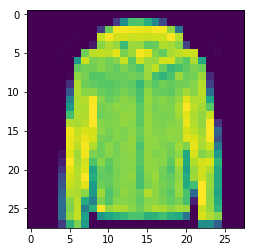

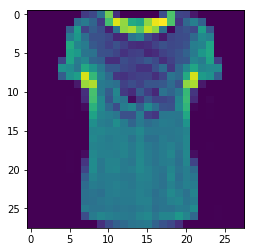

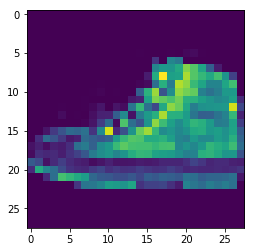

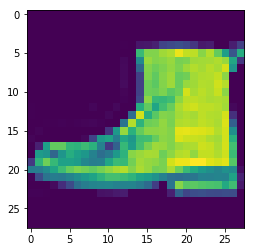

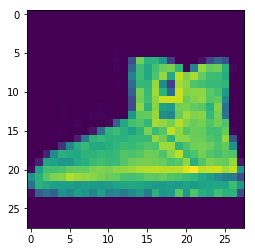

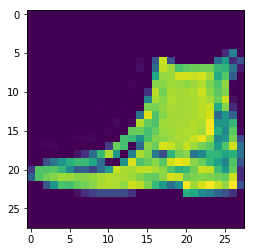

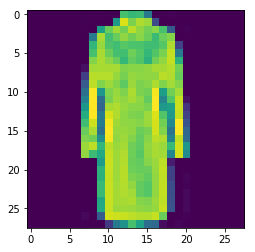

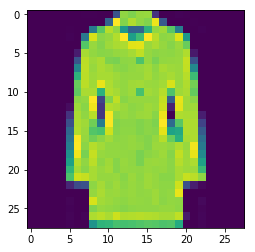

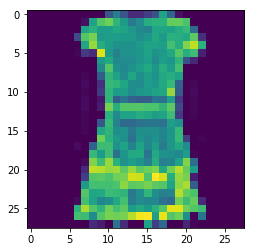

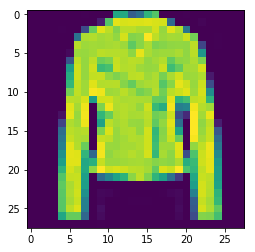

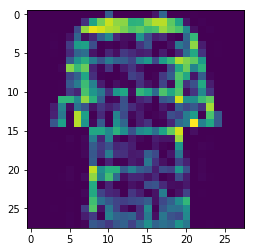

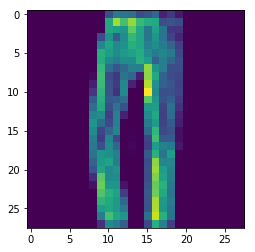

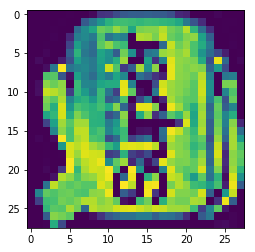

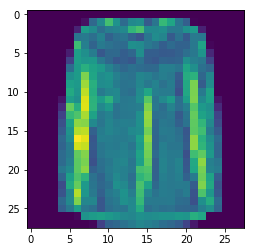

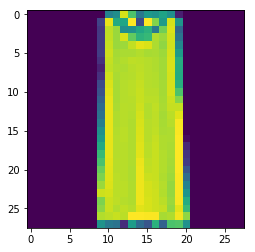

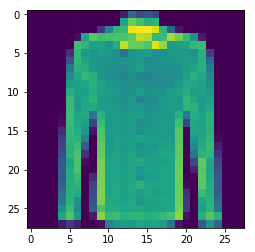

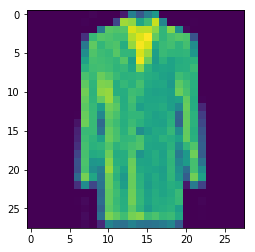

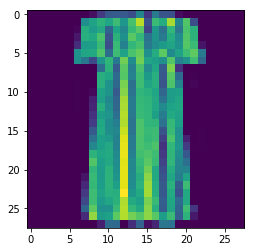

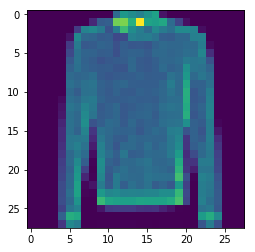

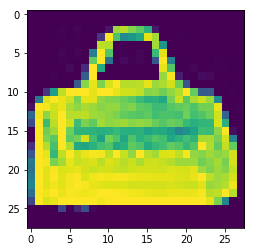

In [5]:
import numpy as np

with tf.Session() as sess:  
    init = tf.global_variables_initializer()  
    sess.run(init)  
    coord = tf.train.Coordinator()  
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)  
    for i in range(20):  #读取20个样本
        img, lab = sess.run([image, label])  
        result = Image.fromarray(img)  
        plt.imshow(img) #可视化
        plt.show()
        img = np.array(img, dtype='uint8')
        result=Image.fromarray(img)
        result.save(str(i) +'_'+str(lab)+ '.png', 'png')  #保存文件
        pass  
    pass  
    coord.request_stop()  
    coord.join(threads)